<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

The guided approach explained here will help you to understand how you should design and approach Data Science problems. Though there are many ways to do the same analysis, I have used the codes which I found more efficient and helpful.

The idea is just to show you the path, try your own ways and share the same with others.

**What would be the workflow?**

**1. Problem Identification**

**2. What data do we have?**

**3. Exploratory data analysis**

**4. Feature engineering**

**5. Creating a model using Keras**

**6. Model evaluation**

**7. Conclusions**

That's all you need to solve a data science problem.

# Problem Identification
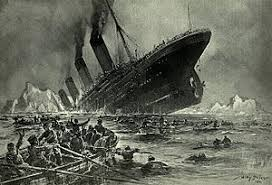

**Best Practice -** The most important part of any project is correct problem identification. Before you jump to "How to do this" part like typical Data Scientists, understand "What/Why" part.  
Understand the problem first and draft a rough strategy on a piece of paper to start with. Write down things like what are you expected to do & what data you might need or let's say what all algorithms you plan to use. 

Now the [Titanic challenge](https://www.kaggle.com/c/titanic/) hosted by Kaggle is a competition in which the goal is to **predict the survival or the death of a given passenger based on a set of variables describing  age, sex, or passenger's class on the boat**.

![](http://www.tyro.com/content/uploads/2016/04/blog-twenty-one-business-icebergs-sink-business-280416.jpg)

So it is a classification problem and you are expected to predict Survived as 1 and Died as 0.

# What data do we have?
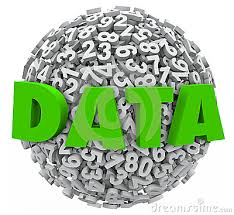

Let's import necessary libraries & bring in the datasets in Python environment first. Once we have the datasets in Python environment we can slice & dice the data to understand what we have and what is missing.

In [2]:
# Import the python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
get_ipython().run_line_magic('matplotlib', 'inline')
sns.set(style='white', context='notebook', palette='deep')
import warnings
warnings.filterwarnings('ignore')


In [3]:
# load the data
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
IDtest = pd.DataFrame(test["PassengerId"])

In [4]:
test.info() # We have 891 observations & 12 columns. See the mix of variable types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
test.info() # We have 417 observations & 11 columns (no response 'Survived' column).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Exploratory data analysis
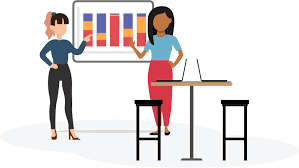

One important aspect of machine learning is to ensure that the variables show almost the same trend across train & test data. If not, it would lead to overfitting because model is representing a relationship which is not applicable in the test dataset. 

I will give you one example here. As we do variable analysis, try to replicate (wherever applicable) the code for test data and see if there is any major difference in data distribution. 

**Example** - Let's start with finding the number of missing values. If you compare the output you will see that missing value percentages do not vary much across train & test datasets.

Use the groupby/univariate/bivariate analysis method to compare the distribution across Train & Test data

In [6]:
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:30]
miss_train = pd.DataFrame({'Train Missing Ratio' :train_na})
miss_train.head()

,Train Missing Ratio
Cabin,77.104377
Age,19.865320
Embarked,0.224467


In [7]:
test_na = (test.isnull().sum() / len(test)) * 100
test_na = test_na.drop(test_na[test_na == 0].index).sort_values(ascending=False)[:30]
miss_test = pd.DataFrame({'Test Missing Ratio' :test_na})
miss_test.head()

,Test Missing Ratio
Cabin,78.229665
Age,20.574163
Fare,0.239234


In [8]:
# Fill empty and NaNs values with NaN
train = train.fillna(np.nan)
test = test.fillna(np.nan)

**PassengerId**

Not relevant from modeling perspective so we will drop this variable later

**Pclass**

Pclass is categorical variable. Let's look at the distribution.

,Survived
Pclass,
3,491
1,216
2,184


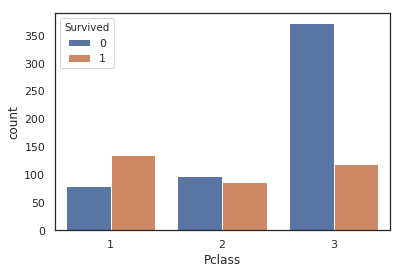

In [9]:
# Analyze the count of survivors by Pclass

ax = sns.countplot(x="Pclass", hue="Survived", data=train)
train[['Pclass', 'Survived']].groupby(['Pclass']).count().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


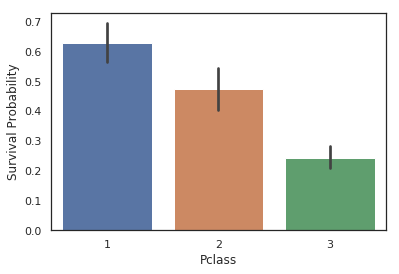

In [10]:
# Analyze the Survival Probability by Pclass

g = sns.barplot(x="Pclass",y="Survived",data=train)
g = g.set_ylabel("Survival Probability")
train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

Approximately 62% of Pclass = 1 passenger survived followed by 47% of Pclass2.

**Name**

Not relevant from analysis & modeling perspective. We will drop this feature later after creating a new variable as Title.

**Sex**

Based on analysis below, female had better chances of survival. 

![](https://www.ajc.com/rf/image_large/Pub/p9/AJC/2018/07/12/Images/newsEngin.22048809_071418-titanic_Titanic-Image-7--2-.jpg)

,Survived
Sex,
male,577
female,314


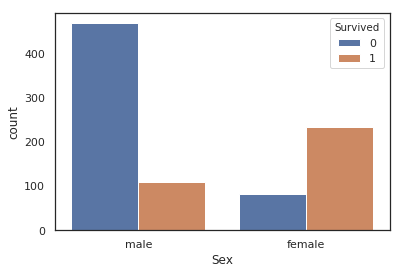

In [11]:
# Count the number of passengers by gender
ax = sns.countplot(x="Sex", hue="Survived", data=train)

# Analyze survival count by gender
train[["Sex", "Survived"]].groupby(['Sex']).count().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


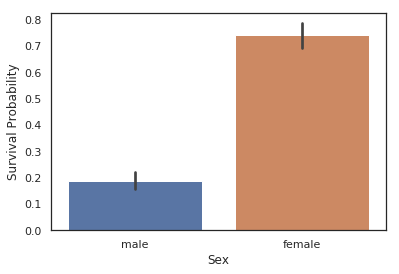

In [12]:
# Analyze the Survival Probability by Gender

g = sns.barplot(x="Sex",y="Survived",data=train)
g = g.set_ylabel("Survival Probability")
train[["Sex", "Survived"]].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

Based on data above, female passengers had better chances of survival than male passengers

**Age**

The insight below connects back to "Ladies and Kids First" scene of the movie. It shows that a good number of babies & young kids survived.

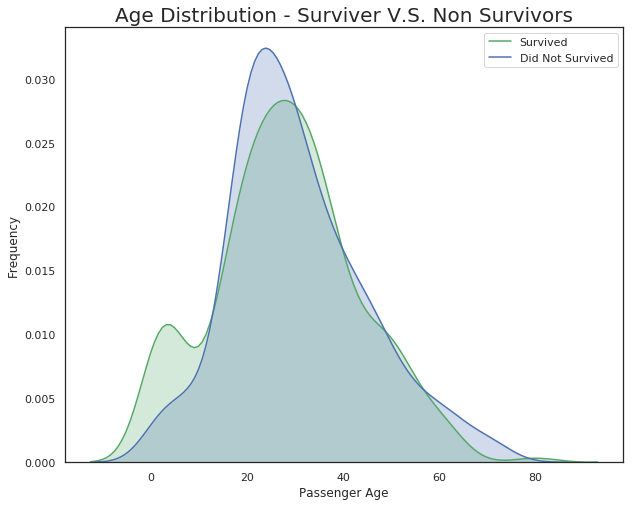

In [13]:
# Let's explore the distribution of age by response variable (Survived)
fig = plt.figure(figsize=(10,8),)
axis = sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='Survived')
axis = sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='b',shade=True,label='Did Not Survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 20)
plt.xlabel("Passenger Age", fontsize = 12)
plt.ylabel('Frequency', fontsize = 12);

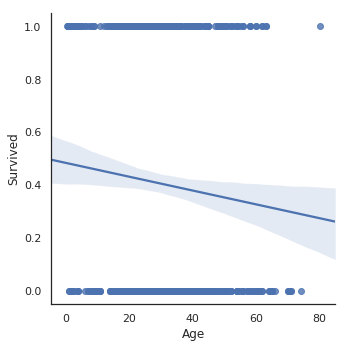

In [14]:
sns.lmplot('Age','Survived',data=train)

# We can also say that the older the passenger the lesser the chance of survival

**SibSP**

This variable refers to number of siblings/spouse onboard. SibSP = 1 and SibSP = 2 shows higher chances of survival.

,Survived
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


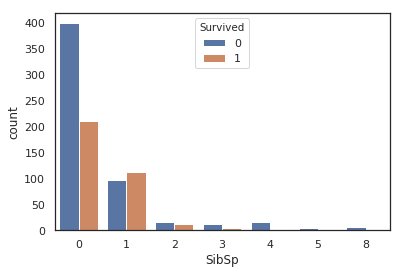

In [15]:
# Analyze the count of survivors by SibSP

ax = sns.countplot(x="SibSp", hue="Survived", data=train)
train[['SibSp', 'Survived']].groupby(['SibSp']).count().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


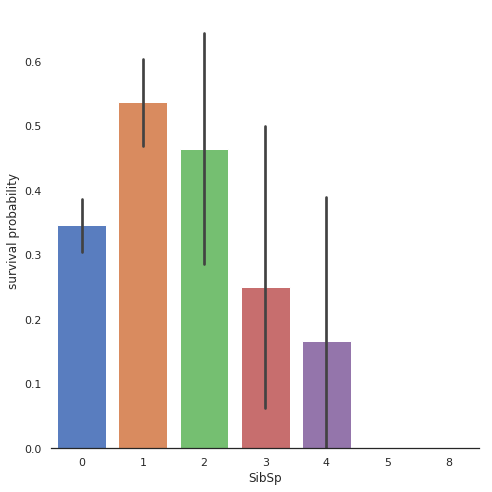

In [16]:
# Analyze probability of survival by SibSP

g  = sns.factorplot(x="SibSp",y="Survived",data=train,kind="bar", size = 7 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")
train[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

**Parch**

Parch indicates number of parents / children aboard the Titanic. Note that Parch = 3 and Parch = 1 shows higher survival probabilities. 

,Survived
Parch,
0,678
1,118
2,80
3,5
5,5
4,4
6,1


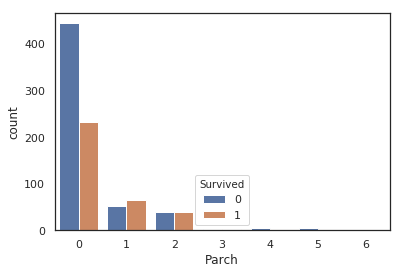

In [17]:
# Analyze the count of survivors by Parch

ax = sns.countplot(x="Parch", hue="Survived", data=train)
train[['Parch', 'Survived']].groupby(['Parch']).count().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


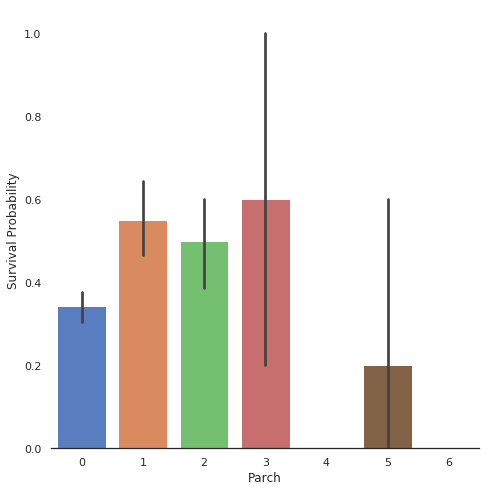

In [18]:
# Analyze the Survival Probability by Parch

g  = sns.factorplot(x="Parch",y="Survived",data=train,kind="bar", size = 7 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")
train[["Parch", "Survived"]].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

**Ticket**

This variable has alphanumeric value which might not be related to Survival directly but we can use this variable to create some additional features.

In [19]:
train['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

**Fare**

Let's check the distribution first.


 mu = 32.20 and sigma = 49.67



Text(0.5,1,'Fare distribution')

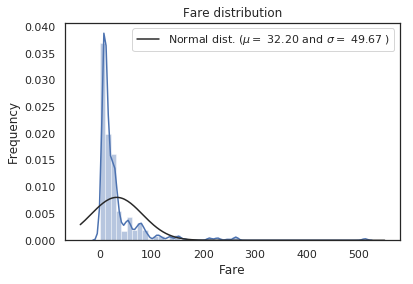

In [20]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics
sns.distplot(train['Fare'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['Fare'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
           loc='best')
plt.ylabel('Frequency')
plt.title('Fare distribution')

The Fare variable is right skewed. 
So either we can transform this variable using log function and make it more normally distributed or we can create bins. We will do this during feature engineering process & decide what works best.

**Cabin**

Alphanumeric variable. 

687 missing values in train & 327 missing values in test data - which needs to be treated. We can create more features using this Cabin variable. 

In [21]:
# Let's check the unique values
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

**Embarked**

C = Cherbourg, Q = Queenstown, S = Southampton

Let's explore the variable with Survival rate. Embarked represents port of embarkation. As the analysis output below suggests Emabrked C shows high probabilities of survival.

,Survived
Embarked,
S,644
C,168
Q,77


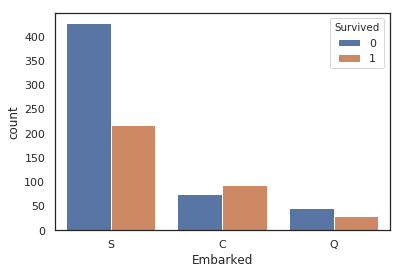

In [22]:
# Analyze the count of survivors by Embarked variable

ax = sns.countplot(x="Embarked", hue="Survived", data=train)
train[['Embarked', 'Survived']].groupby(['Embarked']).count().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


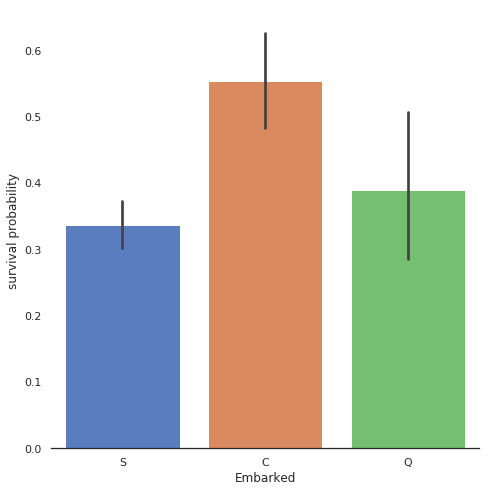

In [23]:
# Analyze the Survival Probability by Embarked

g  = sns.factorplot(x="Embarked",y="Survived",data=train,kind="bar", size = 7 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")
train[["Embarked", "Survived"]].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False)

**Additional analysis**

Let's create few additional charts to see how different variables are related.

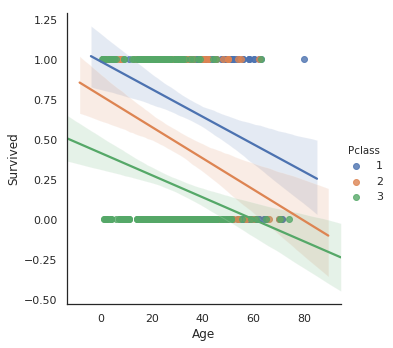

In [24]:
# Age, Pclass & Survival
sns.lmplot('Age','Survived',data=train,hue='Pclass')

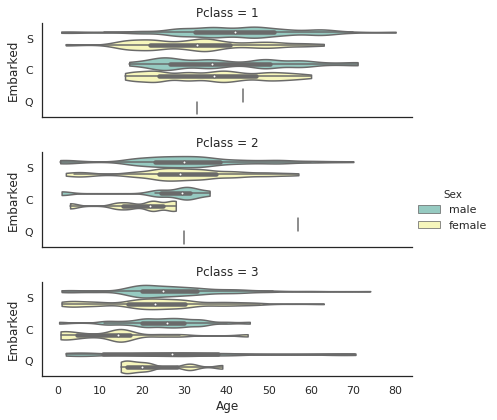

In [25]:
# Age, Embarked, Sex, Pclass
g = sns.catplot(x="Age", y="Embarked",  hue="Sex", row="Pclass",   data=train[train.Embarked.notnull()], 
orient="h", height=2, aspect=3, palette="Set3",  kind="violin", dodge=True, cut=0, bw=.2)

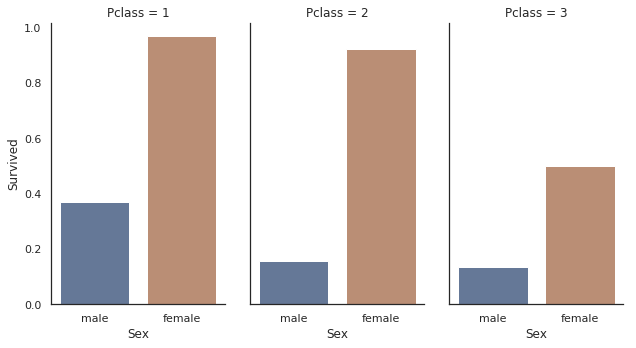

In [26]:
# Relation among Pclass, Gender & Survival Rate
g = sns.catplot(x="Sex", y="Survived", col="Pclass", data=train, saturation=.5, 
                kind="bar", ci=None, aspect=.6)

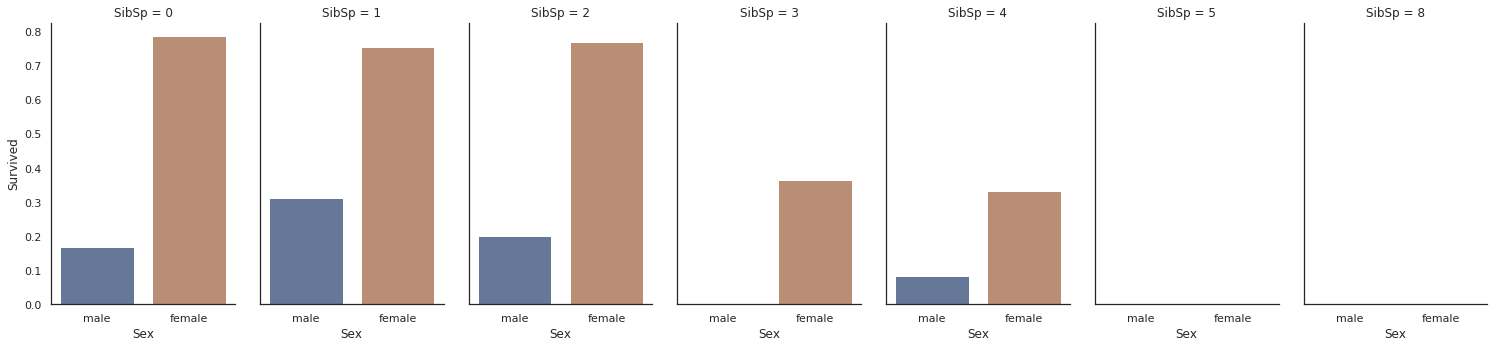

In [27]:
# Relation among SibSP, Gender & Survival Rate
g = sns.catplot(x="Sex", y="Survived", col="SibSp", data=train, saturation=.5, 
                kind="bar", ci=None, aspect=.6)

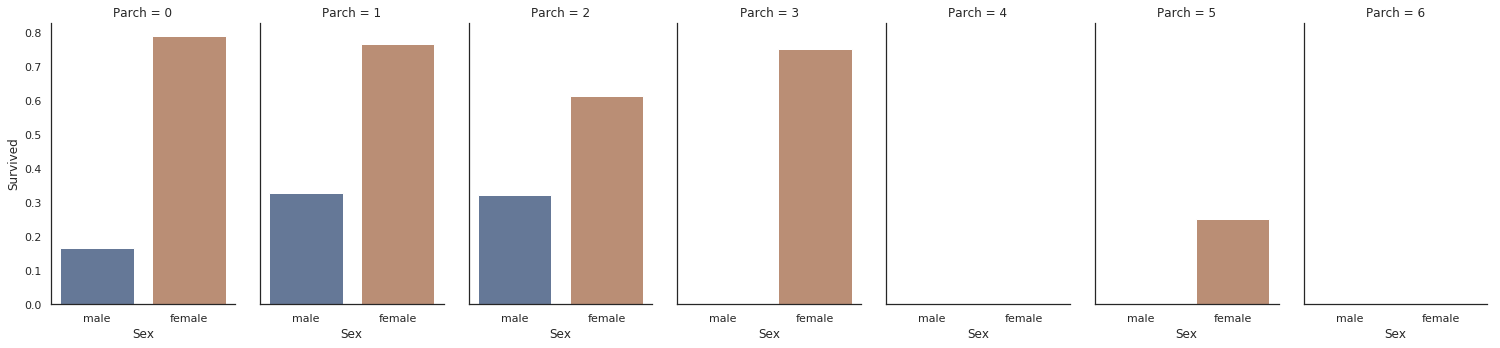

In [28]:
# Relation among Parch, Gender & Survival Rate
g = sns.catplot(x="Sex", y="Survived", col="Parch", data=train, saturation=.5, 
                kind="bar", ci=None, aspect=.6)

# Feature engineering
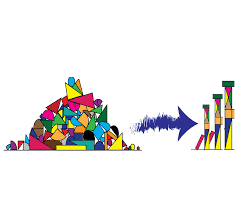

This kernel is based on classic "**LESS IS MORE**" approach so we will try some iterations of feature addition and deletion and will try to keep the ones which give the best output.



What we need to do to process following variables  - 

**PassengerID** - No action required

**PClass** - Have only 3 numerical values. We will use it as it is.

**Name** - Can be used to create new variable Title by extracting the salutation from name.

**Sex** - Create dummy variables

**Age** - Missing value treatment, followed by creating bins for this feature

**SibSP** - Drop the variable after using it to create few additional features

**Parch** - Drop the variable after using it to create few additional features

**Ticket** - Create dummy variables post feature engineering

**Fare** - Create bins for this feature

**Cabin** - Drop the variable after testing the importance

**Embarked** - Drop the variable after testing the importance

In [29]:
# Let's combining train & test for quick feature engineering. 
# Variable source is a kind of tag which indicates data source in combined data
train['source']='train'
test['source']='test'
combdata = pd.concat([train, test],ignore_index=True)
print (train.shape, test.shape, combdata.shape)

(891, 13) (418, 12) (1309, 13)


In [30]:
# Let's check the data
combdata.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,source
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,train
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,train
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,train
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,train
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,train


**PassengerID**

In [31]:
# PassengerID - Drop PassengerID
combdata.drop(labels = ["PassengerId"], axis = 1, inplace = True)

**Pclass**

In [32]:
# Pclass - Use as it is
combdata['Pclass'].unique()

array([3, 1, 2])

**Name**

In [33]:
combdata['Title'] = combdata.Name.map( lambda x: x.split(',')[1].split( '.' )[0].strip())

# inspect the amount of people for each title
combdata['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Mlle              2
Ms                2
Dona              1
the Countess      1
Sir               1
Lady              1
Jonkheer          1
Mme               1
Capt              1
Don               1
Name: Title, dtype: int64

In [34]:
# Name - Create 4 major categories & analyze the survival rate

combdata['Title'] = combdata['Title'].replace('Mlle', 'Miss')
combdata['Title'] = combdata['Title'].replace(['Mme','Lady','Ms'], 'Mrs')
combdata.Title.loc[ (combdata.Title !=  'Master') & (combdata.Title !=  'Mr') & 
                   (combdata.Title !=  'Miss')  & (combdata.Title !=  'Mrs')] = 'Others'

# inspect the correlation between Title and Survived
combdata[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.701087
2,Mr,0.156673
3,Mrs,0.796875
4,Others,0.318182


In [35]:
# Create dummy variable & drop variable Name

combdata = pd.get_dummies(combdata, columns = ["Title"])

In [36]:
# Drop the variable Name
combdata = combdata.drop(labels=['Name'], axis=1)

**Sex**

In [37]:
# Sex - Create dummy variables
combdata["Sex"] = combdata["Sex"].map({"male": 0, "female":1}) 
# combdata = pd.get_dummies(combdata, columns = ["Sex"])

**Creating Family Size variable using SibSp & Parch**

In [38]:
# Create a variable representing family size from SibSp and Parch
combdata["Fsize"] = combdata["SibSp"] + combdata["Parch"] + 1

# Analyze the correlation between Family and Survived
combdata[['Fsize', 'Survived']].groupby(['Fsize'], as_index=False).mean()

,Fsize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [39]:
# Check the count
combdata["Fsize"].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Fsize, dtype: int64

Survival rate improves with family size but not beyond family size 4 so we can combine the family size > 4 together

,Survived
Fsize,
4,0.724138
3,0.578431
2,0.552795
1,0.303538
0,0.161290


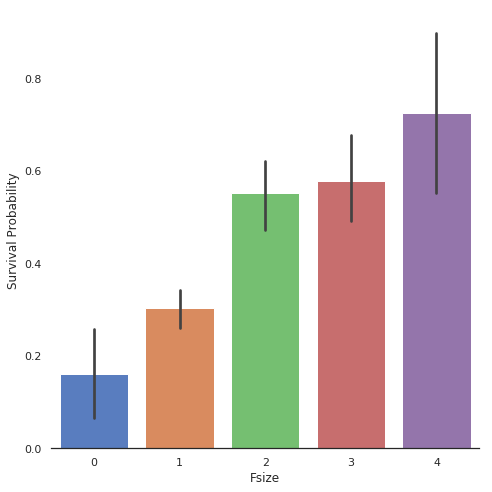

In [40]:
# Analyze the Survival Probability by Fsize

combdata.Fsize = combdata.Fsize.map(lambda x: 0 if x > 4 else x)
g  = sns.factorplot(x="Fsize",y="Survived",data=combdata,kind="bar", size = 7 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")
combdata[["Fsize", "Survived"]].groupby(['Fsize']).mean().sort_values(by='Survived', ascending=False)

In [41]:
# Check the count by Family Size now
combdata['Fsize'].value_counts()

1    790
2    235
3    159
0     82
4     43
Name: Fsize, dtype: int64

**Parch**

In [42]:
# Drop the variable Parch
combdata = combdata.drop(labels='Parch', axis=1)

**Ticket**

In [43]:
# Ticket - Extracting the ticket prefix. This might be a representation of class/compartment.
combdata["Ticket"].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

Tickets are of 2 types here. 

Type 1 has only number and 
Type 2 is a combination of some code followed  by the number. Let's extract the first digit and compare it with survival probability.

In [44]:
combdata.Ticket = combdata.Ticket.map(lambda x: x[0])

# inspect the correlation between Ticket and Survived
combdata[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean()

#combdata[["Ticket", "Survived"]].groupby(['Ticket']).mean().sort_values(by='Survived', ascending=False)

,Ticket,Survived
0,1,0.630137
1,2,0.464481
2,3,0.239203
3,4,0.200000
4,5,0.000000
5,6,0.166667
6,7,0.111111
7,8,0.000000
8,9,1.000000
9,A,0.068966


In [45]:
# Let's look at the number of people for each type of tickets
combdata['Ticket'].value_counts()

3    429
2    278
1    210
S     98
P     98
C     77
A     42
W     19
F     13
7     13
4     11
6      9
L      5
5      3
8      2
9      2
Name: Ticket, dtype: int64

Most of these tickets belong to category 1, 2, 3, S, P, C. Based on value counts and average survival, we can put all other ticket categories into a new category '4'.

In [46]:
combdata['Ticket'] = combdata['Ticket'].replace(['A','W','F','L','5','6','7','8','9'], '4')

# check the correlation again
combdata[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Survived
0,1,0.630137
1,2,0.464481
2,3,0.239203
3,4,0.166667
4,C,0.340426
5,P,0.646154
6,S,0.323077


In [47]:
# Create dummy variables
combdata = pd.get_dummies(combdata, columns = ["Ticket"], prefix="T")

**Fare**

In [48]:
# Fare - Check the number of missing value
combdata["Fare"].isnull().sum()

# Only 1 value is missing so we will fill the same with median
combdata["Fare"] = combdata["Fare"].fillna(combdata["Fare"].median())

In [49]:
# bin Fare into five intervals with equal amount of people
combdata['Fare-bin'] = pd.qcut(combdata.Fare,5,labels=[1,2,3,4,5]).astype(int)

# inspect the correlation between Fare-bin and Survived
combdata[['Fare-bin', 'Survived']].groupby(['Fare-bin'], as_index=False).mean()

,Fare-bin,Survived
0,1,0.217877
1,2,0.201087
2,3,0.426901
3,4,0.443243
4,5,0.645349


**Cabin**

In [50]:
# Cabin - Replace the missing Cabin number by the type of cabin unknown 'U'
combdata["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'U' for i in combdata['Cabin'] ])

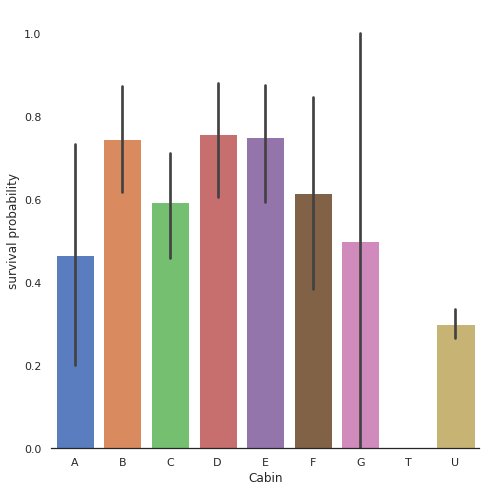

In [51]:
# Let's plot the survival probability by Cabin
g  = sns.factorplot(x="Cabin",y="Survived",data=combdata,kind="bar", size = 7 ,
                    palette = "muted",order=['A','B','C','D','E','F','G','T','U'])
g.despine(left=True)
g = g.set_ylabels("survival probability")

In [52]:
combdata = combdata.drop(labels='Cabin', axis=1)

**Embarked**

In [53]:
combdata = combdata.drop(labels='Embarked', axis=1)

**Age**

There are 2 ways of handling the missing age values.
1. Fill the age with median age of similar rows according to Sex, Pclass, Parch & SibSP
2. or use a quick machine learning algorithm to predict the age values based on Age, Title, Fare & SibSP

I used both of them to test which one works better. One of the code will be markdown to avoid confusion.

In [54]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
combdata_temp = combdata[['Age','Title_Master','Title_Miss','Title_Mr','Title_Mrs','Title_Others','Fare-bin','SibSp']]

X  = combdata_temp.dropna().drop('Age', axis=1)
Y  = combdata['Age'].dropna()
holdout = combdata_temp.loc[np.isnan(combdata.Age)].drop('Age', axis=1)

regressor = RandomForestRegressor(n_estimators = 300)
#regressor = GradientBoostingRegressor(n_estimators = 500)
regressor.fit(X, Y)
y_pred = np.round(regressor.predict(holdout),1)
combdata.Age.loc[combdata.Age.isnull()] = y_pred

combdata.Age.isnull().sum(axis=0) 

0

In [55]:
bins = [ 0, 4, 12, 18, 30, 50, 65, 100] # This is somewhat arbitrary...
age_index = (1,2,3,4,5,6,7)

combdata['Age-bin'] = pd.cut(combdata.Age, bins, labels=age_index).astype(int)
combdata[['Age-bin', 'Survived']].groupby(['Age-bin'],as_index=False).mean()

,Age-bin,Survived
0,1,0.675000
1,2,0.452381
2,3,0.402597
3,4,0.315789
4,5,0.427083
5,6,0.375000
6,7,0.125000


**SibSP**

In [56]:
# Drop the variables we don't need

combdata =combdata.drop(labels=['Age', 'Fare', 'SibSp'],axis = 1)

# Build a model
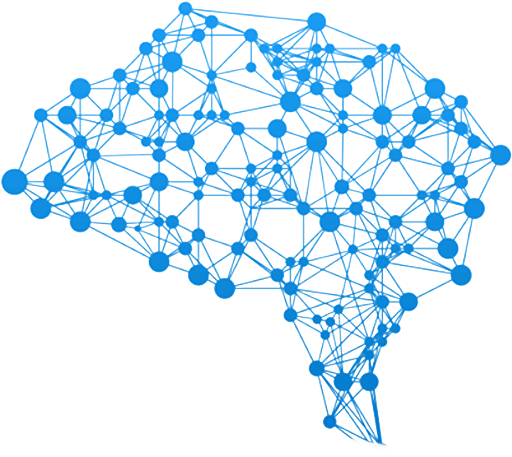

In [57]:
## Separate train dataset and test dataset using the index variable 'source'

train_df = combdata.loc[combdata['source']=="train"]
test_df = combdata.loc[combdata['source']=="test"]
test_df.drop(labels=["Survived"],axis = 1,inplace=True)

train_df.drop(labels=["source"],axis = 1,inplace=True)
test_df.drop(labels=["source"],axis = 1,inplace=True)

test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 17 columns):
Pclass          418 non-null int64
Sex             418 non-null int64
Title_Master    418 non-null uint8
Title_Miss      418 non-null uint8
Title_Mr        418 non-null uint8
Title_Mrs       418 non-null uint8
Title_Others    418 non-null uint8
Fsize           418 non-null int64
T_1             418 non-null uint8
T_2             418 non-null uint8
T_3             418 non-null uint8
T_4             418 non-null uint8
T_C             418 non-null uint8
T_P             418 non-null uint8
T_S             418 non-null uint8
Fare-bin        418 non-null int64
Age-bin         418 non-null int64
dtypes: int64(5), uint8(12)
memory usage: 24.5 KB


In [58]:
## Separate train features and label 

train["Survived"] = train["Survived"].astype(int)
Y_train = train["Survived"]
X_train = train_df.drop(labels = ["Survived"],axis = 1)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 17 columns):
Pclass          891 non-null int64
Sex             891 non-null int64
Title_Master    891 non-null uint8
Title_Miss      891 non-null uint8
Title_Mr        891 non-null uint8
Title_Mrs       891 non-null uint8
Title_Others    891 non-null uint8
Fsize           891 non-null int64
T_1             891 non-null uint8
T_2             891 non-null uint8
T_3             891 non-null uint8
T_4             891 non-null uint8
T_C             891 non-null uint8
T_P             891 non-null uint8
T_S             891 non-null uint8
Fare-bin        891 non-null int64
Age-bin         891 non-null int64
dtypes: int64(5), uint8(12)
memory usage: 52.2 KB


In [59]:
import keras 
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense      # create layers

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 17))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
model.fit(X_train, Y_train, batch_size = 32, epochs = 200)

Using TensorFlow backend.


Epoch 1/200
891/891 [==============================] - 0s 531us/step - loss: 0.6912 - acc: 0.6049
Epoch 2/200
891/891 [==============================] - 0s 42us/step - loss: 0.6779 - acc: 0.6162
Epoch 3/200
891/891 [==============================] - 0s 44us/step - loss: 0.6157 - acc: 0.6476
Epoch 4/200
891/891 [==============================] - 0s 43us/step - loss: 0.5245 - acc: 0.7733
Epoch 5/200
891/891 [==============================] - 0s 50us/step - loss: 0.4695 - acc: 0.8047
Epoch 6/200
891/891 [==============================] - 0s 44us/step - loss: 0.4445 - acc: 0.8081
Epoch 7/200
891/891 [==============================] - 0s 43us/step - loss: 0.4307 - acc: 0.8114
Epoch 8/200
891/891 [==============================] - 0s 43us/step - loss: 0.4250 - acc: 0.8159
Epoch 9/200
891/891 [==============================] - 0s 44us/step - loss: 0.4211 - acc: 0.8305
Epoch 10/200
891/891 [==============================] - 0s 44us/step - loss: 0.4189 - acc: 0.8215
Epoch 11/200
891/891 [======

# Model evaluation

In [60]:
scores = model.evaluate(X_train, Y_train, batch_size=30)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

891/891 [==============================] - 0s 65us/step
acc: 85.19%


# Final submission

In [61]:
y_pred = model.predict(test_df)
y_final = (y_pred > 0.5).astype(int).reshape(test_df.shape[0])

output = pd.DataFrame({'PassengerId': IDtest['PassengerId'], 'Survived': y_final})

#output = pd.concat([IDtest,y_final],axis=1)
output.to_csv('Neural Network Prediction.csv', index=False)

# Conclusion
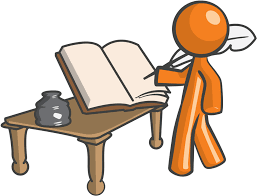

Title, Sex_Female, Fare & PClass seems to be common features preferred for classification.

While Title & Age feature represents the Age category of passengers the features like Fare, PClass, Cabin etc. represents the economic status. Based on our findings we can conclude that Age, Gender & features representing social/economic status were primary factors affecting the survival of passenger.


**If you like this notebook or find this notebook helpful, Please upvote and/or leave a comment**
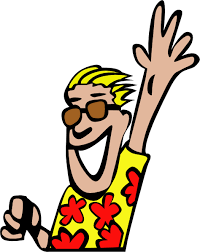